# Project: Investigate a Dataset (No-show Appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.  
● ‘ScheduledDay’ tells us on what day the patient set up their appointment.  
● ‘Neighborhood’ indicates the location of the hospital.  
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.  
● 'No-show': it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up  

### Questions
>1. What is the likelihood of patients showing up for scheduled appointment?
>2. What is the ratio between genders?
>3. Does No-show count have a correlation with Gender?  
>4. What is the age distribution of the patients?  
>5. Are schorlarship patients more likely to turn up for appointments? 
>6. Does No-show count have a correlation with receiving SMS? 
>7. Do alcoholics skip their scheduled appointments?  


In [1]:
# import statements of the packages to be used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

UsageError: Line magic function `%` not found.


<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load the data
app_df = pd.read_csv('Medical Appointments.csv')

In [3]:
import seaborn as sns
sns.__version__

'0.11.2'

In [4]:
# print out a few lines
app_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# columns and rows
app_df.shape

(110527, 14)

In [6]:
# inspect data
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
# find missing or null data.
app_df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

> No null Values found in the data set

In [8]:
# find duplicate data
app_df.duplicated().sum()

0

> No duplicate data found in the dataset

In [9]:
#find unique data values
app_df. nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

### Data Cleaning 

In [10]:
# Rename incorrect column names.
app_df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap'},inplace = True)
# Replace string operations
app_df.columns = app_df.columns.str.replace('-', '_')
# Convert PatientId from Float to Integer type
app_df['PatientId'] = app_df['PatientId'].astype('int64')
# inspect the columns
app_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')

In [11]:
# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
app_df['ScheduledDay'] = pd.to_datetime(app_df['ScheduledDay'])
app_df['AppointmentDay'] = pd.to_datetime(app_df['AppointmentDay'])
# inspect data after changes
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int64              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hypertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handicap        110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No_show       

In [12]:
app_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,29872499824296,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis  

### Research Question 1:  What is the likelihood of patients showing up for scheduled appointment?

In [13]:
# Define function for Univariant analysis
def univariantV(x,t,u,v):
    return sns.countplot(x=x, data=app_df).set(title=t, xticklabels=[u, v]);

In [14]:
# Define function for multivariant analysis
def multivariantV(a,t,b,c):
    return sns.countplot(x=a, hue= 'No_show', data=app_df).set(title=t, xticklabels=[b, c]);           

> Bar graph showing likelihood of somebody showing up

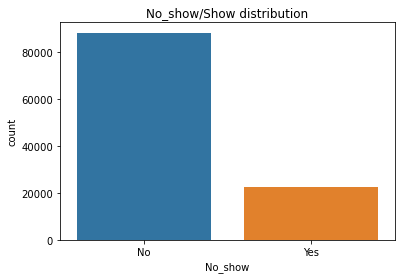

In [15]:
univariantV('No_show', 'No_show/Show distribution','No','Yes');

> 'No-show' is the dependent variable  
> The plot above indicates that around 90,000 patients showed up for their appointment

### Research Question 2: What is the ratio between genders?

> Bar graph showing distribution of gender

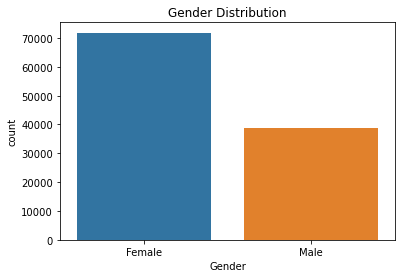

In [16]:
univariantV('Gender', 'Gender Distribution','Female','Male');

> Their are more female patients than males patients

### Research Question 3: Does No-show count have a correlation with Gender?  

> Bar graph showing distribution Show/ No_show based on gender

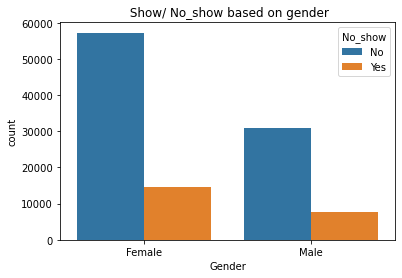

In [17]:
multivariantV('Gender',' Show/ No_show based on gender', 'Female', 'Male');

> The ratio between No-show between female and male is almost the same. Therefore 'Gender' is does not play a role in determining if a patient will show up for the appointment or not.

 ### Research Question 4: What is the age distribution of the patients?  

> Histogram showing age distribution

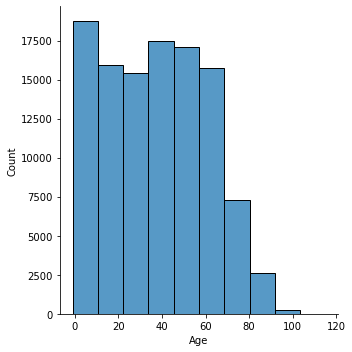

In [18]:
# Age distribution
sns.displot(app_df, x='Age', bins=10);
#app_df['Age'].plot(kind='hist');

> Most patients are within the age group of 0 to 10

### Research Question 5: Are schorlarship patients more likely to turn up for appointments? 

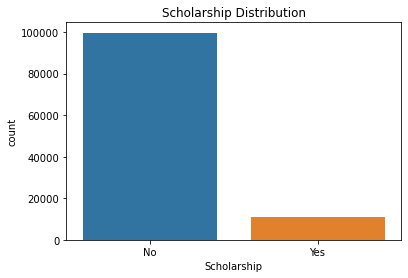

In [19]:
# scholarship distribution
univariantV('Scholarship', 'Scholarship Distribution','No','Yes');
# app_df['Scholarship'].value_counts().plot(kind='pie');

> There are 100,000 patients without scholarship

> Bar graph showing distribution Show/ No_show based on Scholarship

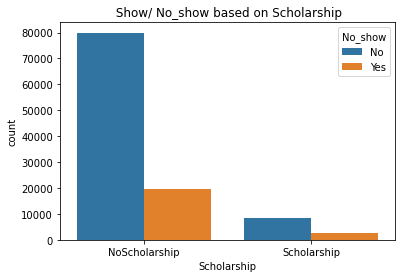

In [20]:
# Show/ No_show based on Scholarship
multivariantV('Scholarship',' Show/ No_show based on Scholarship', 'NoScholarship', 'Scholarship');


> For the patients with scholarship around 75% showed up.  
> Therefore, 'Scholariship' status will help determine if a patient will show up for the scheduled appointment

### Research Question 6: Does No-show count have a correlation with receiving SMS? 

> Bar graph showing distribution Show/ No_show based on sms_received

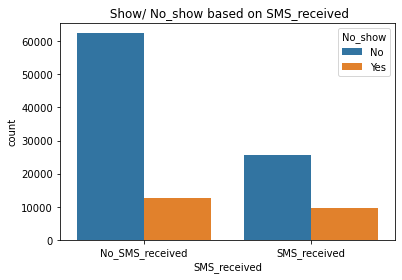

In [21]:
# sms_received distribution
multivariantV('SMS_received',' Show/ No_show based on SMS_received', 'No_SMS_received', 'SMS_received');


> around 80% of the patients who did not receive the SMS showed up for the scheduled appointment.  
> this is a negative corelation, therefore it does not increase the chances of the patient showing up for their scheduled appointment.

### Research Question 7: Do alcoholics skip their scheduled appointments? 

> Bar graph showing Alcoholism distribution 

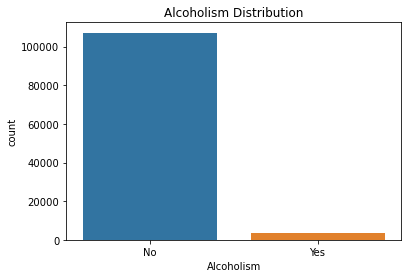

In [22]:
# Show/ No_show based on Alcoholism
univariantV('Alcoholism', 'Alcoholism Distribution','No','Yes');


> Bar graph showing distribution Show/ No_show based on Alcoholism

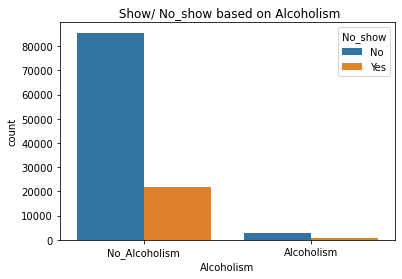

In [23]:
# Show/ No_show based on Alcoholism diagnosis
multivariantV('Alcoholism',' Show/ No_show based on Alcoholism', 'No_Alcoholism', 'Alcoholism');


> Most patient with Alcoholism showed up on their scheduled appointment.     
> This shows that alcoholism does not hinder patients from showing up for their scheduled appointment

<a id='conclusions'></a>
## Conclusions  
> 1. Over 80% of the patients attend their scheduled appointment.  
> 2. The highest number of patients are of age group 0-10 years.  
> 3. 'Gender' is does not play a role in   determining if a patient will show up for the appointment or not.  
> 4. Higher percent of patients with scholarships attend their scheduled appointment  
> 5. Since a higher number of patients that did not receive the SMS showed up for their scheduled appointment, its unclear what kind of message is sent to the patient.  
> 6. Most Alcoholics show up for their Scheduled appointments.    


### Limitation  
> 1. limited time to understand and use different graphs for Vizualisations  


### Reference  
> 1. https://seaborn.pydata.org/tutorial/distributions.html  
> 2.  https://www.geeksforgeeks.org/grouped-barplots-in-python-with-seaborn/  
> 3. https://stackabuse.com/seaborn-distribution-histogram-plot-tutorial-and-examples/  
> 4. https://yuleii.github.io/2020/06/20/data-visualization-with-seaborn.html